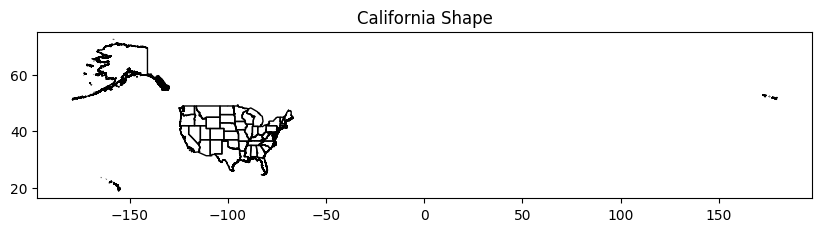

In [4]:
import os
import sys
import folium
import pandas as pd
import geopandas as gpd
import numpy as np
from folium import GeoJson, FeatureGroup, Marker
from folium.raster_layers import ImageOverlay
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from PIL import Image, ImageEnhance
from rasterio.warp import reproject, Resampling, calculate_default_transform
from rasterio import features
from rasterio.transform import from_bounds
from scipy.ndimage import gaussian_filter
import io
import base64
import rasterio
from shapely.geometry import mapping
#from state_dict import alpha3_to_alpha2

data_precision = 3

# Local imports
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.append(parent_dir)

from geodata_processing_kaoru import download_gdf
from getData import getStateNightData_global, getStateNightData, reproject_to_epsg3857
from state_dict import iso_to_state, state_to_iso

# Parameters
PRODUCT = 'VNP46A4'
YEAR = 2023
#country='CONUS'
country='USA'
state = 'CA'

# Geometry
if state != '':
    gdf = download_gdf(country=country, resolution=1)
    #gdf = gdf[gdf.NAME_1 == state]
    shape = gdf[gdf.NAME_1 == state].geometry
    if len(state) == 2:
        state = iso_to_state[state]
    iso = state_to_iso[state]
else:
    print('No state specified using the whole country')
    gdf = download_gdf(country=country, resolution=1)

shape = gdf.geometry
gdf = gpd.GeoDataFrame({'geometry': shape}, crs="EPSG:4326")
shapes = [mapping(geom) for geom in gdf.geometry]

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor='black', facecolor='none')
ax.set_title('California Shape')
plt.show()

In [5]:
gdf

,geometry
0,"MULTIPOLYGON (((-88.12060 30.23320, -88.12330 ..."
1,"MULTIPOLYGON (((-179.13150 51.20970, -179.1328..."
2,"MULTIPOLYGON (((-110.75620 31.33290, -111.0750..."
3,"MULTIPOLYGON (((-91.90710 33.00800, -92.86190 ..."
4,"MULTIPOLYGON (((-117.23300 32.77420, -117.2336..."
5,"MULTIPOLYGON (((-105.75740 36.99700, -106.8717..."
6,"MULTIPOLYGON (((-73.62580 40.98110, -73.62780 ..."
7,"MULTIPOLYGON (((-75.08640 38.43200, -75.08740 ..."
8,"MULTIPOLYGON (((-77.01640 38.80930, -77.02640 ..."
9,"MULTIPOLYGON (((-81.96260 24.52210, -81.96430 ..."


In [3]:
gdf

,geometry
